In [22]:
import pandas as pd
import numpy as np
# Some pre-defined functions
# function1: calculate the count and percentage by group
def group_by_percentage(df, col_name, asc = False):
    series_count = df.groupby([col_name]).size().sort_values(ascending=asc)
    df_count = series_count.to_frame(name = 'count_cnt').reset_index()
    df_count['percentage'] = round((df_count['count_cnt'] / df_count['count_cnt'].sum()) * 100, 2)
    return df_count

In [38]:
# In the file data.csv, you will find a dataset from Compustat, consisting of all US firms that have assets above $10M
df1 = pd.read_csv('../Statistical analysis test/data.csv')

In [39]:
df1.info()
# gvkey:  Identifier(unique, 6122 entries)
# fyear:  Fiscal year (2015 only in this dataset)
# tic  :  A stock ticker is a report of the price for certain securities, updated continuously throughout the trading session by the various stock exchanges.
# conm :  Company name(unique)
# oiadp:  Operating income after depreciation
# at   :  Total assets
# ind  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6122 entries, 0 to 6121
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gvkey   6122 non-null   int64  
 1   fyear   6122 non-null   int64  
 2   tic     6122 non-null   object 
 3   conm    6122 non-null   object 
 4   oiadp   6122 non-null   float64
 5   at      6122 non-null   float64
 6   ind     6103 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 334.9+ KB


In [40]:
df1.head()

,gvkey,fyear,tic,conm,oiadp,at,ind
0,1004,2015,AIR,AAR CORP,66.100,1442.100,20.0
1,1045,2015,AAL,AMERICAN AIRLINES GROUP INC,7284.000,48415.000,20.0
2,1050,2015,CECE,CECO ENVIRONMENTAL CORP,28.651,598.819,20.0
3,1062,2015,ASA,ASA GOLD AND PRECIOUS METALS,-1.713,162.350,40.0
4,1072,2015,AVX,AVX CORP,169.302,2409.819,45.0


In [41]:
df1.loc[df1['ind'].isna()]

,gvkey,fyear,tic,conm,oiadp,at,ind
2004,20694,2015,GGAC,GARNERO GROUP ACQUISITION CO,-1.205,144.601,NaN
2044,21013,2015,TRTL,TERRAPIN 3 ACQUISITION CORP,-0.633,213.299,NaN
2084,21378,2015,AXAR,AXAR ACQUISITION CORP,-0.965,240.723,NaN
2110,21600,2015,CADT,DT ASIA INVESTMENTS LTD,-1.450,70.218,NaN
2160,21944,2015,HRMN,HARMONY MERGER CORP,-0.338,117.813,NaN
2162,21954,2015,HDRA,HYDRA INDUSTRIES ACQUISITION,-3.531,80.330,NaN
2199,22225,2015,OACQF,ORIGO ACQUISITION CORP,-0.413,42.937,NaN
2207,22316,2015,ARWA,AROWANA INC,-0.444,84.569,NaN
2220,22480,2015,FNTC,FINTECH ACQUISITION CORP,-0.229,100.210,NaN
2265,22878,2015,QPAC,QUINPARIO ACQUISITION CORP 2,-1.028,351.112,NaN


# Task 1
## 1.1 Define variables
• Return on assets: roa = oiadp / at 

• The (natural) logarithm of assets: lat = log(at)

In [42]:
# check: no denominator <= 0
df1[df1['at'] <= 0]

,gvkey,fyear,tic,conm,oiadp,at,ind


In [43]:
df1['roa'] = df1['oiadp'] / df1['at']
# at is lighly skewed
df1['lat'] = np.log(df1['at'])

## 1.2 Regress(OLS)

Then regress (using ordinary least squares) roa onto lat

a. What is the regression coefficient? Is it statistically significant? \
   Answer: **If there is no constant in the LR model**, the coefficiency of lat is 0.0007, since p-value 0.165 is greater than 0.05/0.1, so this coef is not statistically significant

b. Describe the meaning of the regression coefficient in one sentence.\
   Answer: One unit change of lat will cause an avaerage 0.0007 unit change onto roa in the same direction.

In [100]:
import statsmodels.api as sm
# without interception
model_1 = sm.OLS(df1['roa'], df1['lat']).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    roa   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.927
Date:                Sun, 17 Jul 2022   Prob (F-statistic):                       0.165
Time:                        10:12:34   Log-Likelihood:                         -935.54
No. Observations:                6122   AIC:                                      1873.
Df Residuals:                    6121   BIC:                                      1880.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lat            0.0007      0.000      1.388      0.165      -0.000       0.002
==============================================================================
Omnibus:                     5306.321   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           208836.514
Skew:                          -4.024   Prob(JB):                         0.00
Kurtosis:                      30.458   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**However, if there is a constant in the LR model, result is different!**

As we can see below, coefficency of lat is -0.3362, since p-value is 0, which is less than significance level of 0.05. Therefore, it is statistically significant.

Under this circumstance, -0.3362 means one unit change of lat will cause an average 0.3362 unit change to roa in the opposite direction.

In [101]:
import statsmodels.formula.api as smf
model_2 = smf.ols(formula='roa ~ 1 + lat', data=df1).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    roa   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     951.5
Date:                Sun, 17 Jul 2022   Prob (F-statistic):          2.50e-194
Time:                        10:12:44   Log-Likelihood:                -461.16
No. Observations:                6122   AIC:                             926.3
Df Residuals:                    6120   BIC:                             939.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3362      0.010    -32.029      0.000      -0.357      -0.316
lat            0.0449      0.001     30.846      0.000       0.042       0.048
==============================================================================
Omnibus:                     5112.498   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           235340.275
Skew:                          -3.722   Prob(JB):                         0.00
Kurtosis:                      32.448   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

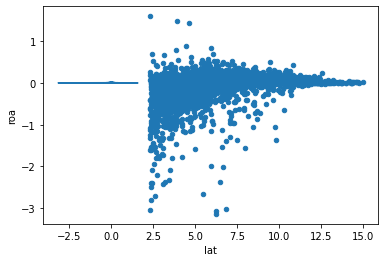

In [102]:
para1 = model_1.params
ax = df1.plot(kind='scatter', x='lat', y='roa')
ax.plot(df1['roa'], para1.lat * df1['lat'])


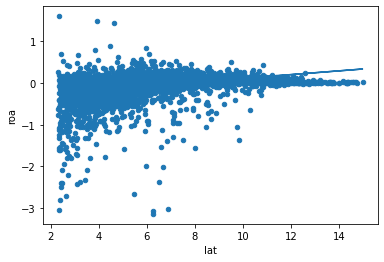

In [105]:
para2 = model_2.params
ax = df1.plot(kind='scatter', x='lat', y='roa')
ax.plot(df1['lat'], para2.Intercept + para2.lat * df1['lat'])

## Task 2
Now perform the same regression, but include industry fixed effects\
a. Which industry sector is on average most profitable?\
    Answer: Consumer Staples

b. What is the regression coefficient of lat? Is it statistically significant?\
    Answer: 0.0373, since p-value is 0, which is less than the usual significance level of 0.05. Therefore, it is statistically significant.

c. Describe the meaning of the regression coefficient in one sentence\
    Answer: In the regression model with dummy variables, positive coefficient means that roa on average is higher for the industry than others, while the 
    negative coefficient means roa of this industry on average is lower than other industries.

d. In a few sentences, explain the meaning of the difference of this coefficient compared to the previous one (in exercise 1)\
    Answer:\
    1) The coefficient of previous is only for random variable(lat), which represents for the average increase/decrease when one unit of variable changed.\
    2) The coefficient of exercise 2 is for dummy variables, which means the average difference between different categories since dummy variables can only be 1 or 0.




In [106]:
# Estimating a fixed effects model is equivalent to 
# adding a dummy variable for each subject or unit of interest in the standard OLS model.
# 1. drop rows that column ind contains na
df2 = df1.loc[df1['ind'].notna()]

In [107]:
# 2. categorise ind
df2['catefory_ind'] = pd.Categorical(df2['ind'])

<ipython-input-107-ae2b8c1cf6ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['catefory_ind'] = pd.Categorical(df2['ind'])


In [108]:
# 3. LR model with dummy variable
import statsmodels.formula.api as smf
FE_ols = smf.ols(formula='roa ~ 1 + lat +  + C(catefory_ind)', data=df2).fit()
print(FE_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                    roa   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sun, 17 Jul 2022   Prob (F-statistic):               0.00
Time:                        10:13:23   Log-Likelihood:                -70.692
No. Observations:                6103   AIC:                             165.4
Df Residuals:                    6091   BIC:                             246.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

# Task 3
Now add the squared term of the log-assets as a regressor to the regression of exercise 1 (no fixed effects), i.e. regress roa onto lat and lat^2

a. What are the regression coefficients of lat and its square? Are they statistically significant?\
Answer: \
coefficient of lat: 0.1960\
coefficient of lat*lat: -0.0106\
Both of their p-value is 0, so it is statistically significant

b. Is there a level of assets for which, on average, profitability is at a minimum or maximum? If so, at which level?\
Answer:\
level of asset for e^9.222901(10126.398440321449) profitability is at a maximum(0.087023)\
level of asset for e^2.307175(10.046004567637427) profitability is at a minimum(-0.421117)


c. In a few sentences, provide a potential explanation for why the relation between RoA and company size is as you observe.\
Answer:\
Generally, roa is positively related with the company size(or asset/log(asset)). Which means the higher level asset, the higher roa will be.\
However, the square of lat is negatively related with roa. But the impact of the square is less than lat itself. \
Therefore, there will be a threshold of asset. Below this threshold, the roc will increase as the asset increasing. Once the asset is higher than this threshold, the roc will decrease. The calcualtion of this threshold is: $$- \frac{\text{coefficient of lat}}{2 * \text{coefficient of lat}^2}$$



In [109]:
model_3 = smf.ols(formula='roa ~ 1 + lat + np.power(lat, 2)', data=df1).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    roa   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     784.4
Date:                Sun, 17 Jul 2022   Prob (F-statistic):          5.31e-304
Time:                        10:13:27   Log-Likelihood:                -204.85
No. Observations:                6122   AIC:                             415.7
Df Residuals:                    6119   BIC:                             435.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.8167      0.023  

In [131]:
d = {'lat': df1['lat'], 'lat^2': np.power(df1['lat'], 2), 'roa': df1['roa'], 'pred_roa':model_3.predict()}
df_pred = pd.DataFrame(data=d)

In [133]:
# level of asset for e^9.222901(10126.398440321449) profitability is at a maximum
df_pred.loc[df_pred['pred_roa'].idxmax()]

lat          9.222901
lat^2       85.061906
roa          0.106237
pred_roa     0.087023
Name: 3574, dtype: float64

In [148]:
# level of asset for e^2.307175(10.046004567637427) profitability is at a minimum
df_pred.loc[df_pred['pred_roa'].idxmin()]

lat         2.307175
lat^2       5.323054
roa        -0.612582
pred_roa   -0.421117
Name: 3718, dtype: float64

In [147]:
np.power(np.e, 2.307175)

10.046004567637427

In [149]:
df_pred

,lat,lat^2,roa,pred_roa
0,7.273856,52.908976,0.045836,0.046671
1,10.787565,116.371558,0.150449,0.061001
2,6.394959,40.895505,0.047846,0.002066
3,5.089754,25.905601,-0.010551,-0.094465
4,7.787307,60.642149,0.070255,0.065133
...,...,...,...,...
6117,8.585443,73.709823,0.025905,0.082709
6118,3.910221,15.289831,-0.339531,-0.212841
6119,11.300400,127.699048,0.008435,0.041152
6120,4.547912,20.683501,-0.157579,-0.145172
